In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers


In [ ]:
! pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json  ~/.kaggle/
! chmod 600  ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ckay16/accident-detection-from-cctv-footage

100% 249M/249M [00:14<00:00, 21.8MB/s]
100% 249M/249M [00:14<00:00, 17.8MB/s]


In [ ]:
!unzip /content/accident-detection-from-cctv-footage.zip

Archive:  /content/accident-detection-from-cctv-footage.zip
  inflating: data/test/Accident/acc1 (7).jpg  
  inflating: data/test/Accident/test10_33.jpg  
  inflating: data/test/Accident/test10_56.jpg  
  inflating: data/test/Accident/test10_61.jpg  
  inflating: data/test/Accident/test12_13.jpg  
  inflating: data/test/Accident/test12_16.jpg  
  inflating: data/test/Accident/test13_22.jpg  
  inflating: data/test/Accident/test15_15.jpg  
  inflating: data/test/Accident/test18_22.jpg  
  inflating: data/test/Accident/test18_24.jpg  
  inflating: data/test/Accident/test19_26.jpg  
  inflating: data/test/Accident/test1_18.jpg  
  inflating: data/test/Accident/test1_20.jpg  
  inflating: data/test/Accident/test1_24.jpg  
  inflating: data/test/Accident/test1_26.jpg  
  inflating: data/test/Accident/test1_27.jpg  
  inflating: data/test/Accident/test21_10.jpg  
  inflating: data/test/Accident/test21_14.jpg  
  inflating: data/test/Accident/test21_18.jpg  
  inflating: data/test/Accident/te

In [ ]:

batch_size = 100
img_height = 300
img_width = 300


In [ ]:

training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/data/train/',
    image_size= (img_height, img_width),
    batch_size=batch_size

)

testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/data/test/',
    image_size= (img_height, img_width),
    batch_size=batch_size)

validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
 '/content/data/val/',
    image_size= (img_height, img_width),
    batch_size=batch_size)


Found 791 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Found 98 files belonging to 2 classes.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:

class_names = training_ds.class_names

print(class_names)


['Accident', 'Non Accident']


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

img_shape = (img_height, img_width, 3)

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=img_shape,
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.Conv2D(128, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(len(class_names), activation= 'softmax')
])

9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
from keras.models import load_model
import cv2
import numpy as np

# Load your Keras model
model = load_model('/content/AccidentDetectionModel.h5')


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(training_ds, validation_data = validation_ds, epochs = 20)

Epoch 1/20
8/8 [==============================] - 11s 969ms/step - loss: 0.1431 - accuracy: 0.9507 - val_loss: 0.4100 - val_accuracy: 0.8265
Epoch 2/20
8/8 [==============================] - 3s 419ms/step - loss: 0.0460 - accuracy: 0.9836 - val_loss: 0.2597 - val_accuracy: 0.8776
Epoch 3/20
8/8 [==============================] - 3s 331ms/step - loss: 0.0216 - accuracy: 0.9962 - val_loss: 0.3422 - val_accuracy: 0.8776
Epoch 4/20
8/8 [==============================] - 3s 338ms/step - loss: 0.0124 - accuracy: 0.9949 - val_loss: 0.3815 - val_accuracy: 0.8776
Epoch 5/20
8/8 [==============================] - 3s 337ms/step - loss: 0.0090 - accuracy: 0.9949 - val_loss: 0.4123 - val_accuracy: 0.8776
Epoch 6/20
8/8 [==============================] - 3s 394ms/step - loss: 0.0082 - accuracy: 0.9949 - val_loss: 0.4419 - val_accuracy: 0.8878
Epoch 7/20
8/8 [==============================] - 3s 339ms/step - loss: 0.0091 - accuracy: 0.9949 - val_loss: 0.4274 - val_accuracy: 0.8878
Epoch 8/20
8/8 [===

In [ ]:
model.save("AccidentDetectionModel.h5")

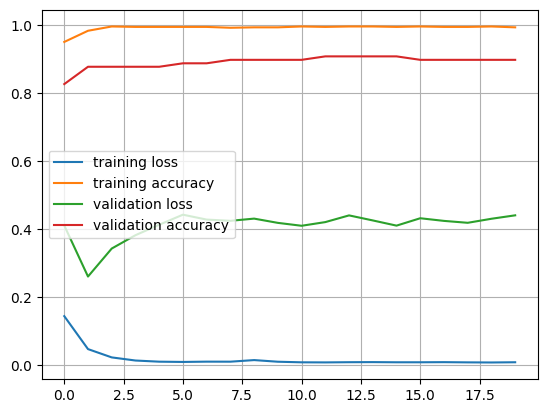

In [ ]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()


plt.plot(history.history['val_loss'], label = 'validation loss')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

4/4 [==============================] - 2s 190ms/step


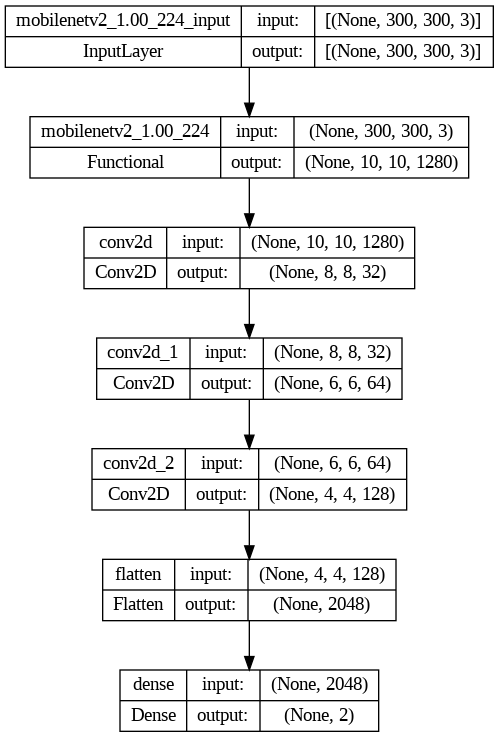

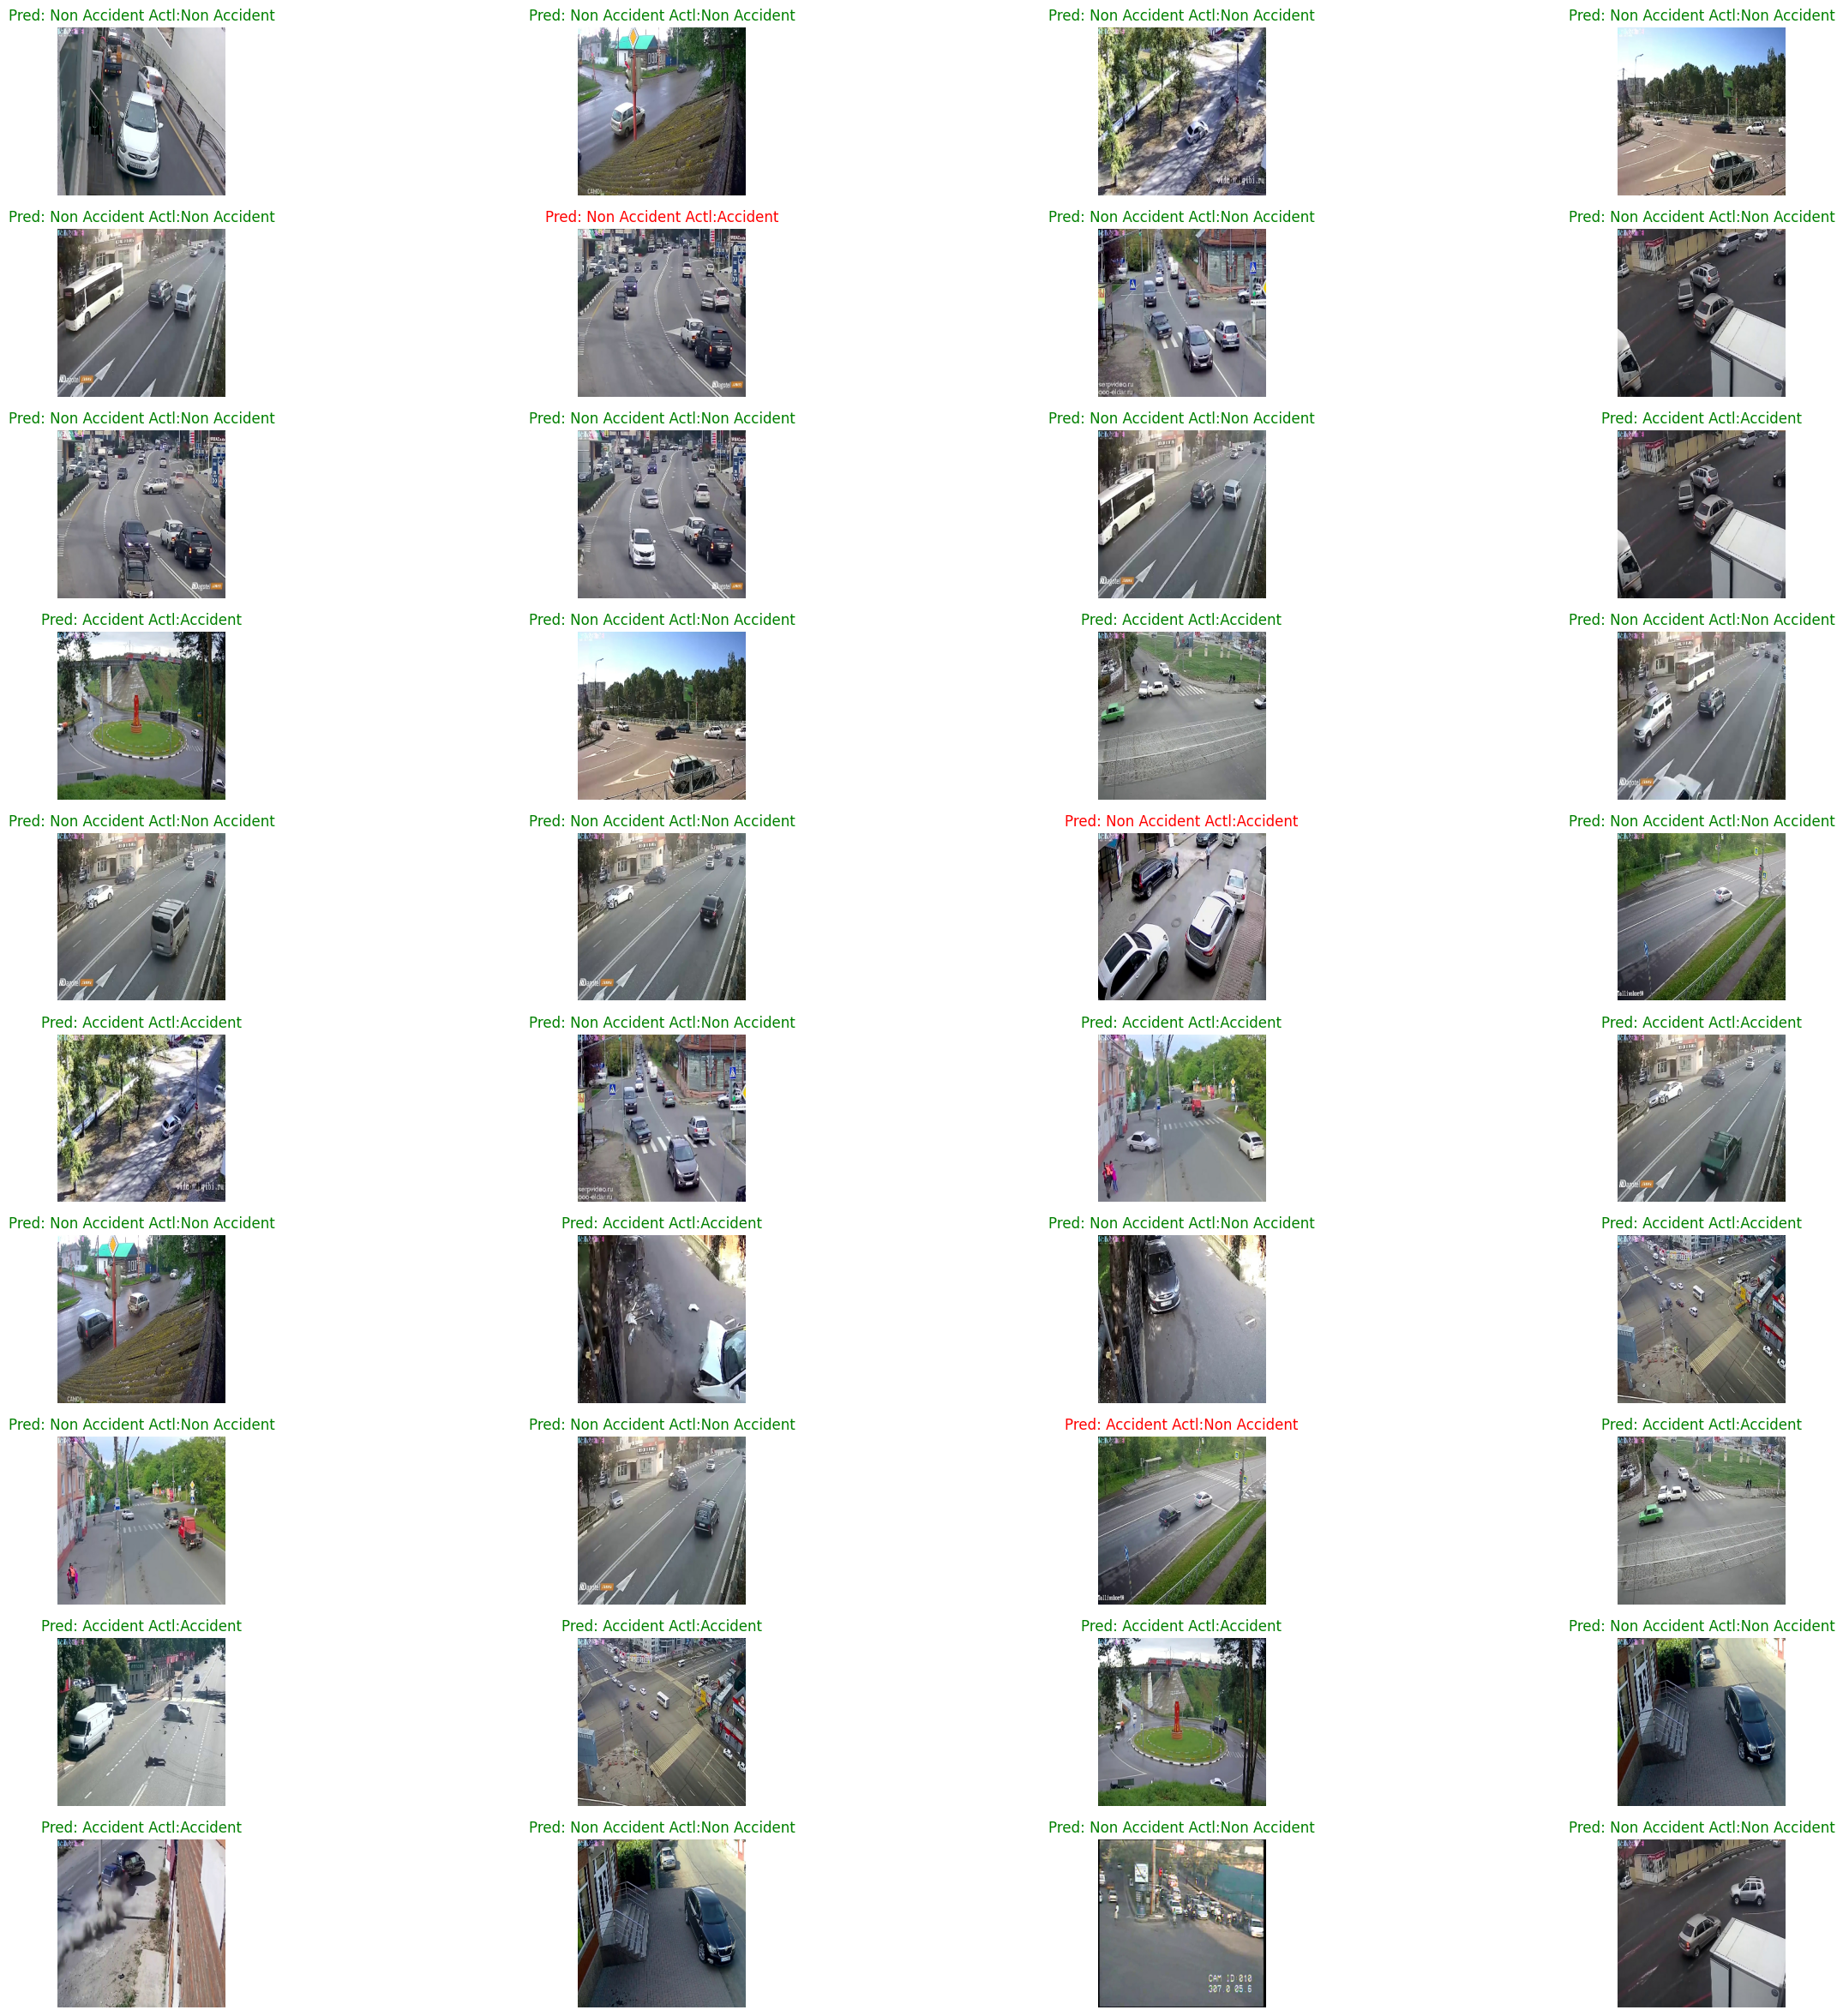

In [ ]:
AccuracyVector = []
plt.figure(figsize=(30, 30))
for images, labels in testing_ds.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []

    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))

    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        if (predlabel[i] == class_names[labels[i]]):
          plt.title('Pred: '+ predlabel[i]+' Actl:'+class_names[labels[i]], color = "green")
        else:
          plt.title('Pred: '+ predlabel[i]+' Actl:'+class_names[labels[i]], color = "red")
        plt.axis('off')
        plt.grid(True)

from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
print(class_names)


['Accident', 'Non Accident']


In [ ]:
def predict_frame(img):
    img_array = tf.keras.utils.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)
    prediction=(model.predict(img_batch) < 0.5).astype("int32")
    if(prediction[0][0]==0):
        return("Accident Detected")
    else:
        return("No Accident")

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import plot_model
# Load your video
video_path = '/content/accident.mp4'
cap = cv2.VideoCapture(video_path)

# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Prepare a figure for plotting
plt.figure(figsize=(30, 30))

# Loop through video frames
for frame_idx in range(frame_count):
    ret, frame = cap.read()
    if not ret:
        break
    input_size = (300, 300)
    frame = cv2.resize(frame, input_size)

    # Convert the frame to the format expected by your model (e.g., RGB)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Normalize pixel values to be in the range [0, 1]
    frame = frame.astype("float32") / 255.0

    # Expand dimensions to match the model's expected input shape
    frame = np.expand_dims(frame, axis=0)

    # Make predictions for the frame
    predictions = model.predict(frame)

    # Get predicted label and confidence
    pred_label = class_names[np.argmax(predictions)]
    confidence = np.max(predictions)

    # Display the frame with prediction
    ax = plt.subplot(10, 4, frame_idx + 1)
    plt.imshow(frame[0].astype("uint8"))

    # Adjust the title based on prediction correctness
    if confidence > 0.5:
        plt.title(f'Frame {frame_idx + 1}\nPred: {pred_label} (Confidence: {confidence:.2f})', color="green")
    else:
        plt.title(f'Frame {frame_idx + 1}\nPred: {pred_label} (Low Confidence)', color="red")

    plt.axis('off')
    plt.grid(True)

# Save the plotted figure
plt.savefig('/content/video_predictions.png')

# Plot the model architecture
plot_model(model, to_file='/content/model_plot.png', show_shapes=True, show_layer_names=True)

# Release the video capture object
cap.release()

<Figure size 3000x3000 with 0 Axes>

In [ ]:

plt.figure(figsize=(30, 30))

predictions = model.predict('/content/data/test/Accident/acc1 (7).jpg')
predlabel = (class_names[np.argmax(mem)])
prdlbl = (np.argmax(mem))

AccuracyVector = np.array(prdlbl) == labels
plt.imshow('/content/data/test/Accident/acc1 (7).jpg'.numpy().astype("uint8"))
if (predlabel[i] == class_names[labels[i]]):
  plt.title('Pred: '+ predlabel[i]+' Actl:'+class_names[labels[i]], color = "green")
else:
  plt.title('Pred: '+ predlabel[i]+' Actl:'+class_names[labels[i]], color = "red")
plt.axis('off')
plt.grid(True)

from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

IndexError: ignored

<Figure size 3000x3000 with 0 Axes>

1/1 [==============================] - 1s 1s/step


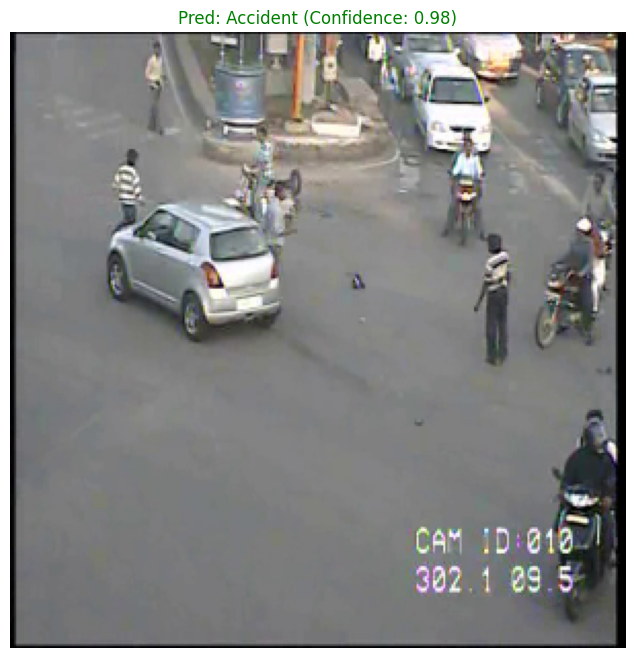

In [ ]:
# Load the image for prediction
image_path = '/content/data/test/Accident/acc1 (7).jpg'
image = cv2.imread(image_path)

# Check if the image is loaded successfully
if image is None:
    print(f"Error: Unable to load image from {image_path}")
else:
    # Convert to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Preprocess the image (adjust this based on your model's requirements)
    input_size = (300, 300)  # Adjust this based on your model's input size
    image = cv2.resize(image, input_size)
    image = image.astype("float32") / 255.0
    image = np.expand_dims(image, axis=0)

    # Make predictions for the image
    predictions = model.predict(image)

    # Get predicted label and confidence
    pred_label = class_names[np.argmax(predictions)]
    confidence = np.max(predictions)

    # Display the image with prediction
    plt.figure(figsize=(8, 8))
    plt.imshow(image[0])
    plt.title(f'Pred: {pred_label} (Confidence: {confidence:.2f})', color="green" if confidence > 0.5 else "red")
    plt.axis('off')
    plt.grid(True)


In [ ]:

# Load your video
video_path = '/content/accident.mp4'
cap = cv2.VideoCapture(video_path)

# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Define the codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Adjust the codec as needed
output_video_path = '/content/output_video.mp4'
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

# Prepare a figure for plotting
plt.figure(figsize=(30, 30))

# Loop through video frames
for frame_idx in range(frame_count):
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to RGB
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Preprocess the frame (adjust this based on your model's requirements)
    input_size = (300, 300)  # Adjust this based on your model's input size
    frame_preprocessed = cv2.resize(frame, input_size)
    frame_preprocessed = frame_preprocessed.astype("float32") / 255.0
    frame_preprocessed = np.expand_dims(frame_preprocessed, axis=0)

    # Make predictions for the frame
    predictions = model.predict(frame_preprocessed)

    # Get predicted label and confidence
    pred_label = class_names[np.argmax(predictions)]
    confidence = np.max(predictions)

    # Display the prediction and confidence on the frame
    cv2.putText(frame, f'Prediction: {pred_label}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)
    cv2.putText(frame, f'Confidence: {confidence:.2f}', (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # # Display the frame with prediction
    # ax = plt.subplot(10, 4, frame_idx + 1)
    # plt.imshow(frame)

    # Adjust the title based on prediction correctness
    if confidence > 0.5:
        plt.title(f'Frame {frame_idx + 1}\nPred: {pred_label} (Confidence: {confidence:.2f})', color="green")
    else:
        plt.title(f'Frame {frame_idx + 1}\nPred: {pred_label} (Low Confidence)', color="red")

    plt.axis('off')
    plt.grid(True)

    # Write the frame to the output video
    out.write(cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))

# Save the plotted figure
plt.savefig('/content/video_predictions.png')



# Release the video capture and writer objects
cap.release()
out.release()

# Show the figure (if using Colab)
plt.show()

<Figure size 3000x3000 with 0 Axes>

In [ ]:
# Mount Google Drive to access files
# from google.colab import drive
# drive.mount('/content/drive')

# %cd /content/drive/MyDrive

# Replace 'your_video.mp4' with the path to your pre-captured video file
video_path = '/content/accident.mp4'

# Run YOLO in prediction mode on the video
!yolo task=detect mode=predict model={HOME}/datasets/runs/detect/train3/weights/best.pt conf=0.25 source={video_path} save=True

# %cd /content/drive/MyDrive

import glob
from IPython.display import Video

# Display the output video
video_output_path = '/content/predictions.avi'  # Change the extension based on your needs

# Replace 'cv2.VideoWriter_fourcc(*'XVID')' with the appropriate codec for your system (e.g., 'MJPG', 'XVID', 'MP4V')
!ffmpeg -y -loglevel error -i /content/predictions.avi -vcodec libx264 -pix_fmt yuv420p /content/predictions.mp4

# Display the output video in the notebook
Video('/content/predictions.mp4',width=600)

/bin/bash: line 1: yolo: command not found
/content/predictions.avi: No such file or directory


ValueError: ignored